In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mini_batch_size, num_epochs = 100, 30
input_size = 252
number_units = 256
number_layers =3
output_size = 88
size_samples = 100

In [3]:
# path to numpy files for data
X_train = np.load("X_NEW.npy")
y_train = np.load("y_NEW.npy")

X_val = np.load("X_val_NEW.npy")
y_val = np.load("y_val_NEW.npy")

In [4]:
print(X_train.shape,y_train.shape,X_val.shape,y_val.shape)

(9322, 100, 252) (9322, 100, 88) (2244, 100, 252) (2244, 100, 88)


In [5]:
# build model
def build_model():
    # create a model
    # generate a rnn lstm model
    
    model = keras.Sequential()
    
    # 1st LSTM layer
    model.add(keras.layers.LSTM(256,
                                input_shape=(size_samples,input_size),
                                return_sequences = True,
                                kernel_initializer = 'normal',
                                activation = 'tanh'))
    model.add(keras.layers.Dropout(0.2))
    
    # 2nd LSTM layer
    model.add(keras.layers.LSTM(256,
                                input_shape=(size_samples,input_size),
                                return_sequences = True,
                                kernel_initializer = 'normal',
                                activation = 'tanh'))
    model.add(keras.layers.Dropout(0.2))
    
    # 3rd LSTM layer
    model.add(keras.layers.LSTM(256,
                                input_shape=(size_samples,input_size),
                                return_sequences = True,
                                kernel_initializer = 'normal',
                                activation = 'tanh'))
    model.add(keras.layers.Dropout(0.2))
    
    #output using dense layer
    
    model.add(keras.layers.Dense(output_size,
                                 kernel_initializer = "normal",
                                 activation = "sigmoid"))
    
    return model

In [6]:
model = build_model()

In [7]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create the accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel("Epoch")
    axs[0].legend(loc ="lower right")
    axs[0].set_title("Accuracy eval")

    # create the error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel('Error')
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [8]:
# compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [9]:
# train the rnn
history = model.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          validation_batch_size=mini_batch_size,
          verbose = True,
          epochs = num_epochs
          )

Epoch 1/30
292/292 [==============================] - 19s 50ms/step - loss: 0.1907 - accuracy: 0.0191 - val_loss: 0.1725 - val_accuracy: 0.0120
Epoch 2/30
292/292 [==============================] - 13s 46ms/step - loss: 0.1857 - accuracy: 0.0187 - val_loss: 0.1700 - val_accuracy: 0.0086
Epoch 3/30
292/292 [==============================] - 13s 46ms/step - loss: 0.1855 - accuracy: 0.0181 - val_loss: 0.1713 - val_accuracy: 0.0086
Epoch 4/30
292/292 [==============================] - 14s 46ms/step - loss: 0.1852 - accuracy: 0.0217 - val_loss: 0.1642 - val_accuracy: 0.0154
Epoch 5/30
292/292 [==============================] - 13s 46ms/step - loss: 0.1854 - accuracy: 0.0219 - val_loss: 0.1683 - val_accuracy: 0.0487
Epoch 6/30
292/292 [==============================] - 13s 46ms/step - loss: 0.1853 - accuracy: 0.0198 - val_loss: 0.1692 - val_accuracy: 0.0076
Epoch 7/30
292/292 [==============================] - 13s 46ms/step - loss: 0.1851 - accuracy: 0.0197 - val_loss: 0.1734 - val_accuracy:

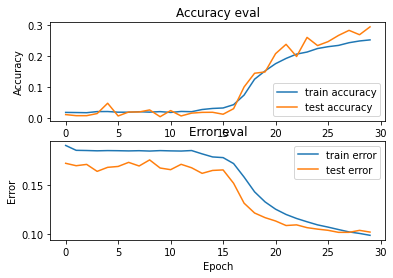

In [10]:
plot_history(history)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 256)          521216    
_________________________________________________________________
dropout (Dropout)            (None, 100, 256)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
dense (Dense)                (None, 100, 88)           2